## A little statistics

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (15,10)

1.

In [59]:
#erf(z)
print(stats.norm.cdf(0.1))
print(stats.norm.cdf(0.01))

0.539827837277029
0.5039893563146316


In [60]:
print(round(stats.norm.ppf(0.539827837277029),1))
print(round(stats.norm.ppf(0.5039893563146316),2))

0.1
0.01


2.

In [61]:
df = 20
d = stats.chi2.rvs(df, loc = 3.0, scale = .01, size = 100000)

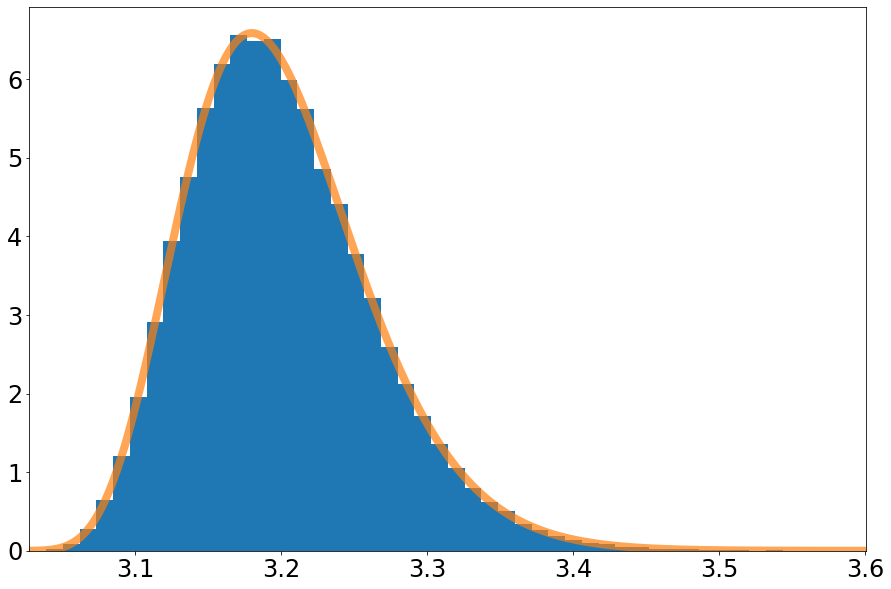

In [62]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim(min(d),max(d))
x = np.linspace(min(d), max(d),1000)
ax.plot(x, stats.chi2.pdf(x, df, loc = 3., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

3.

In [63]:
val = [3.1, 3.3, 3.35, 3.4]

Statistical Question: What is the probability that the data produces a signal that is equally or more signal-like at greater than the chosen value?

$$Probability = \int^{\infty}_{val} \chi ^2 \, dx$$

In [64]:
probability = stats.chi2.sf(val, df, loc = 3., scale = 0.01)
print(probability)

[0.96817194 0.06985366 0.02010428 0.00499541]


In [66]:
sigma = stats.chi2.ppf(probability, df)
print(sigma)

[33.23029673 11.56789791  9.244706    7.43283238]


The probabilities and sigmas increase together as we move further to the left of the plot. 

## Non-continuous Distributions

In [67]:
mu = 6

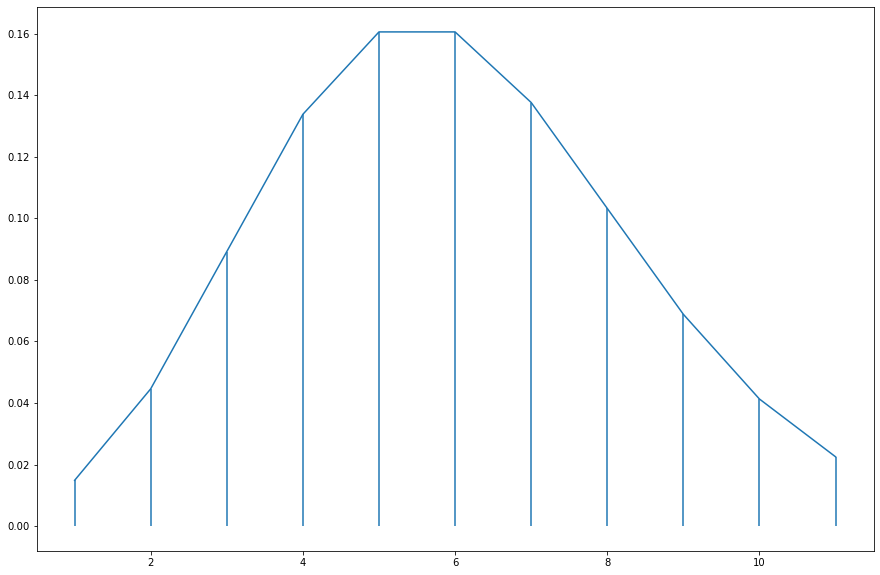

In [68]:
d = stats.poisson.rvs(mu, size = 100000);

fig, ax = plt.subplots(1, 1)
x = np.arange(stats.poisson.ppf(0.01,mu), stats.poisson.ppf(0.99, mu))

plt.plot(x,stats.poisson.pmf(x,mu))
plt.vlines(x, 0, stats.poisson.pmf(x, mu))

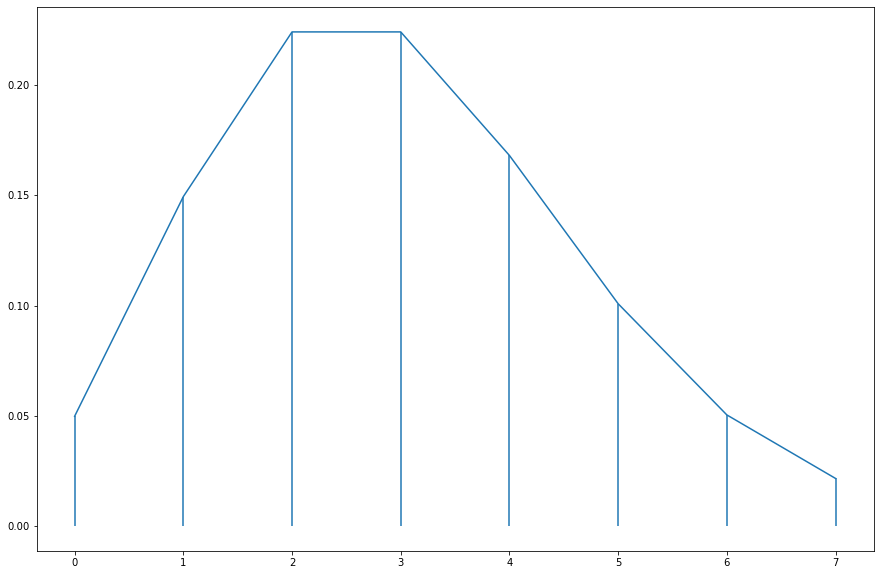

In [69]:
mu = 3
d = stats.poisson.rvs(mu, size = 100000);

fig, ax = plt.subplots(1, 1)
x = np.arange(stats.poisson.ppf(0.01,mu), stats.poisson.ppf(0.99, mu))

plt.plot(x,stats.poisson.pmf(x,mu))
plt.vlines(x, 0, stats.poisson.pmf(x, mu))

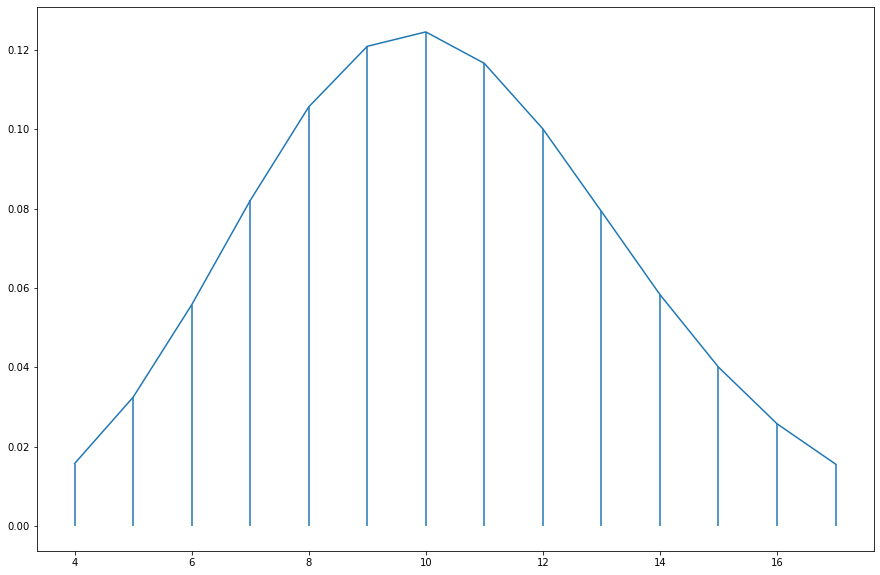

In [2]:
mu = 10.3
d = stats.poisson.rvs(mu, size = 100000);

fig, ax = plt.subplots(1, 1)
x = np.arange(stats.poisson.ppf(0.01,mu), stats.poisson.ppf(0.99, mu))

plt.plot(x,stats.poisson.pmf(x,mu))
plt.vlines(x, 0, stats.poisson.pmf(x, mu))

Poisson distributions are based on $\mu$ which acts like the average value of the distribution. It is the mean rate of the occurance of the specific event. So the distribution is centered on the integer value of $\mu$. It also represents the expected value and variance. 

Statistical Question: What is the probability that the signal-free data gives a signal of 4 or less?

In [3]:
probability = stats.poisson.cdf(4, mu)
print(probability)

0.024062063768182273


Since the values are discrete, probabilities and sigmas are also discrete. This implies that there are a fixed number of possible sigmas for an experiment and only certain sigmas are possible. However, the mean value can be non-integer because it is just average number of events in a given amount of time. So the number of events is discrete but the average is continuous depending on the interval of time since time is continuous.